In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
from simulation_parser import parse_simulation_files, SimulationInfo

In [57]:
#params
save_to = "./sys2-ej1.1.png"
static_path = "../static20.txt"
dynamic_paths = [
  "../dynamic20-n1.txt",
  "../dynamic20-n2.txt",
  "../dynamic20-n3.txt",
  "../dynamic20-n4.txt",
  "../dynamic20-n5.txt"
]

In [58]:
def get_phi_k(nkplus:SimulationInfo, nk: SimulationInfo, len_instants: int, len_particles: int, boundary: float):
  phi_k = []
  last_phi_t = 0
  for t in range(len_instants):
    absDist = 0
    for i in range(len_particles):
      #veln2 = n2Info.particles[i].velocity[t][0]
      #veln1 = n1Info.particles[i].velocity[t][0]
      posn2 = nkplus.particles[i].position[t][0]
      posn1 = nk.particles[i].position[t][0]
      dist = abs(posn2 - posn1)
      wrapDist = boundary - dist
      #print(posn1, posn2, dist, wrapDist, min(dist, wrapDist))
      absDist += min(dist, wrapDist)
    
    #phi_t is supposed to be cumulative!
    phi_t = absDist + last_phi_t
    phi_k.append(phi_t)
    last_phi_t = phi_t

  return phi_k

In [59]:
n1Info = parse_simulation_files(static_path, dynamic_paths[0])
n2Info = parse_simulation_files(static_path, dynamic_paths[1])
n3Info = parse_simulation_files(static_path, dynamic_paths[2])
n4Info = parse_simulation_files(static_path, dynamic_paths[3])
n5Info = parse_simulation_files(static_path, dynamic_paths[4])

len_particles = n1Info.N
boundary = n1Info.L
instants = n1Info.instants

phi_1 = get_phi_k(n2Info, n1Info, len(instants), len_particles, boundary)
phi_2 = get_phi_k(n3Info, n2Info, len(instants), len_particles, boundary)
phi_3 = get_phi_k(n4Info, n3Info, len(instants), len_particles, boundary)
phi_4 = get_phi_k(n5Info, n4Info, len(instants), len_particles, boundary)

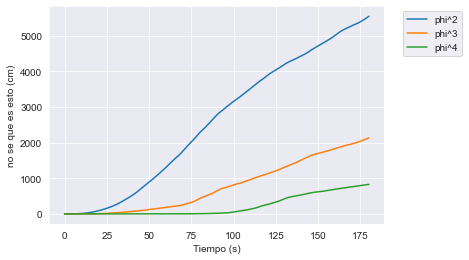

In [60]:
sns.set_style("darkgrid")
plt.tight_layout()
#something's wrong with gear 5 and n=1...
#plt.plot(instants, phi_1, label=f'phi^1')
plt.plot(instants, phi_2, label=f'phi^2')
plt.plot(instants, phi_3, label=f'phi^3')
plt.plot(instants, phi_4, label=f'phi^4')
plt.xlabel('Tiempo (s)')
#TODO: dar un mejor label
plt.ylabel('no se que es esto (cm)')

plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
#plt.show()
plt.savefig(save_to, bbox_inches='tight', dpi=1200)